# Baseline models
### Imports

In [1]:
import pandas as pd
from power_prediction.preprocess_data import get_data_interpolate_nan
from power_prediction.baseline_model import split_data_train_test, plot_residuals
from sklearn.utils import check_random_state
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import LinearRegression

### Random prediction
###### Predicts NE_tot with random values between the minimum and maximum value in the train set

Mean Absolute Error (MAE): 92722.60932651233
Mean Squared Error (MSE): 12841978478.522303
R² Score: -2.359168970866957
Mean Absolute Percentage Error (MAPE): 0.3408001996250714


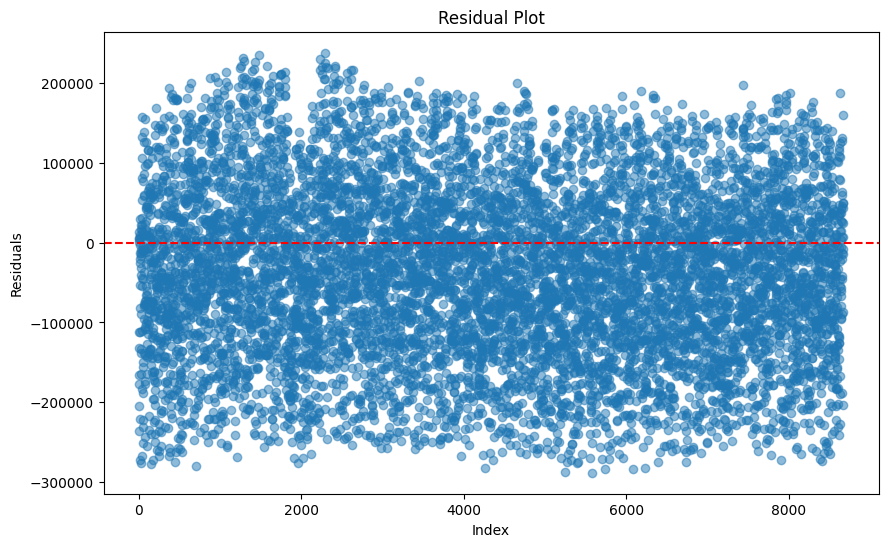

In [5]:
df = get_data_interpolate_nan()
train, test = split_data_train_test(df)
y_train = train['NE_tot']
y_test = test['NE_tot']

rng = check_random_state(seed=42)
random_model_predictions = rng.uniform(y_train.min(), y_train.max(), size=len(y_test))
y_pred = pd.DataFrame(random_model_predictions, columns=['Predictions'])

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
plot_residuals(y_test, y_pred)

### Moving average
###### Predicts NE_tot for the test set by using the last moving average calculated from the last 2 values of the training set.

Mean Absolute Error (MAE): 54186.0056146212
Mean Squared Error (MSE): 3856407042.9692755
R² Score: -0.00874821581742835
Mean Absolute Percentage Error (MAPE): 0.19090583621182078


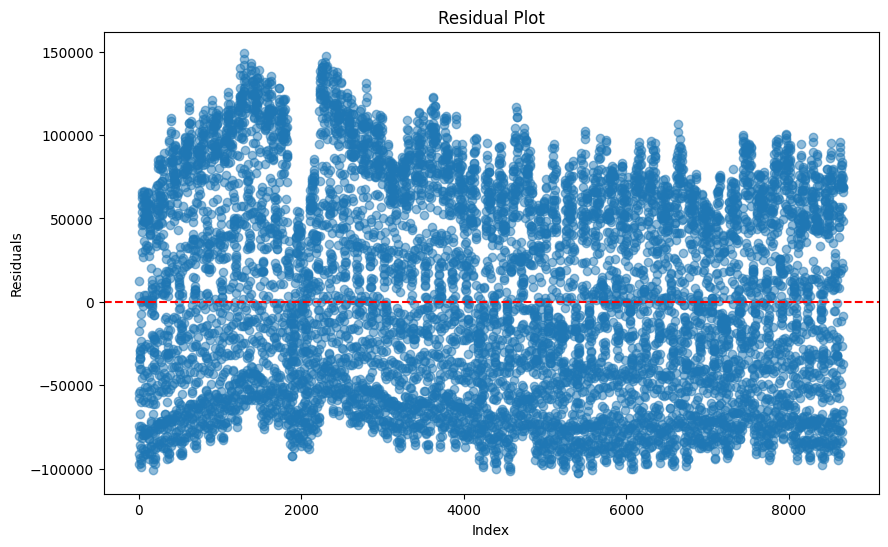

In [8]:
df = get_data_interpolate_nan()
train, test = split_data_train_test(df)
y_train = train['NE_tot']
y_test = test['NE_tot']

moving_avg = y_train.rolling(window=2).mean()
moving_avg = moving_avg.dropna()
last_moving_avg = moving_avg.iloc[-1]
y_pred = pd.DataFrame([last_moving_avg] * len(y_test), columns=['Predictions'])

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
plot_residuals(y_test, y_pred)

### Linear regression (temperature)
##### Trains a linear regression model to predict NE_tot based on temperature (T [°C])

Mean Absolute Error (MAE): 55717.26174394672
Mean Squared Error (MSE): 4067960396.3215866
R² Score: -0.06408575289962015
Mean Absolute Percentage Error (MAPE): 0.21035402283649435


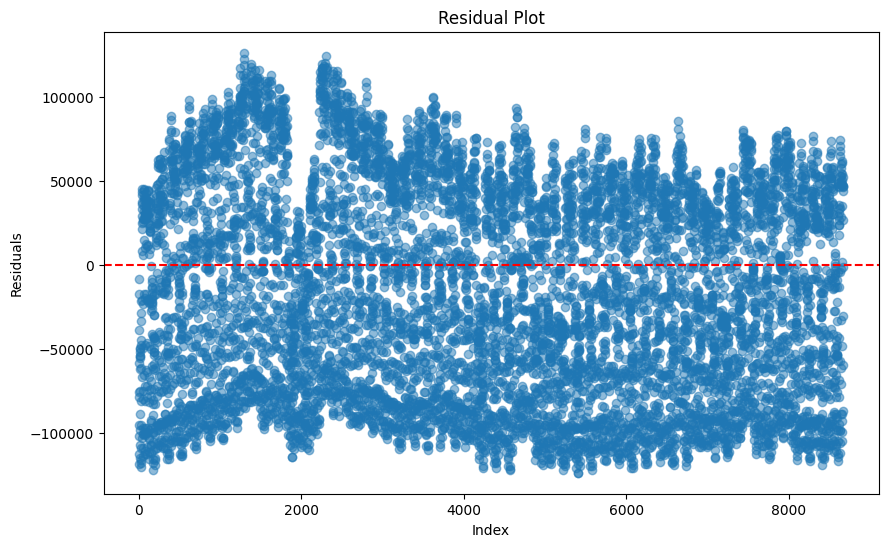

In [9]:
df = get_data_interpolate_nan()
train, test = split_data_train_test(df)

X_train = train[['T [°C]']]
y_train = train['NE_tot']
X_test = test[['T [°C]']]
y_test = test['NE_tot']

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")
print(f"Mean Absolute Percentage Error (MAPE): {mape}")
plot_residuals(y_test, y_pred)